In [96]:
import pandas as pd
df = pd.read_csv(r'/content/loan_data.csv')

In [97]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [98]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [100]:
df_enc = pd.get_dummies(df, columns=['person_education', 'loan_intent', 'person_home_ownership', 'person_gender'], drop_first=True)
df_enc.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Master,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_gender_male
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,No,1,...,True,False,False,False,True,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,0,...,False,True,False,False,False,False,False,True,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,No,1,...,False,False,False,True,False,False,False,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,No,1,...,False,False,False,True,False,False,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,No,1,...,True,False,False,True,False,False,False,False,True,True


In [115]:
df_enc['person_gender_male']

,person_gender_male
0,False
1,False
2,False
3,False
4,True
...,...
44995,True
44996,False
44997,True
44998,True


In [101]:
df_enc['previous_loan_defaults_on_file'] = df_enc['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [102]:
df_enc.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Master,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_gender_male
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,...,True,False,False,False,True,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,False,True,False,False,False,False,False,True,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,...,False,False,False,True,False,False,False,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,...,False,False,False,True,False,False,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,True,False,False,True,False,False,False,False,True,True


In [103]:
df_enc.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


<Axes: >

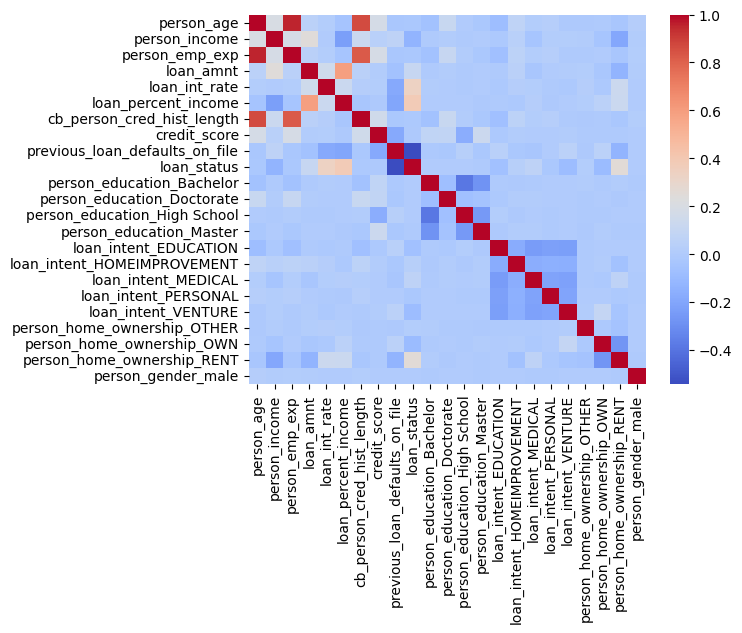

In [117]:
import seaborn as sns
sns.heatmap(df_enc.corr(), cmap='coolwarm')

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [106]:
continuous_columns = [
    'person_age',
    'person_income',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

In [107]:
scaler = StandardScaler()

df_enc[continuous_columns] = scaler.fit_transform(df_enc[continuous_columns])

In [108]:
df_enc.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Master,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_gender_male
0,-0.953538,-0.104090,0,4.024953,1.683039,4.016394,-0.739109,-1.419814,0,1,...,True,False,False,False,True,False,False,False,True,False
1,-1.118963,-0.846005,0,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,1,0,...,False,True,False,False,False,False,False,True,False,False
2,-0.457264,-0.844065,3,-0.646600,0.625557,3.443074,-0.739109,0.047412,0,1,...,False,False,False,True,False,False,False,False,False,False
3,-0.788113,-0.007039,0,4.024953,1.417829,3.443074,-0.996863,0.840507,0,1,...,False,False,False,True,False,False,False,False,True,False
4,-0.622689,-0.176371,1,4.024953,1.095549,4.475050,-0.481354,-0.924130,0,1,...,True,False,False,True,False,False,False,False,True,True


In [109]:
X = df_enc.drop(columns=['loan_status'])
y = df_enc['loan_status']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [111]:
# algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [112]:
models = {
    'naive_bayes' : GaussianNB(),
    'knn' : KNeighborsClassifier(),
    'svc' : SVC(),
    'linear_svc' : LinearSVC(),
    'decision_tree' : DecisionTreeClassifier(),
    'decision_tree100' : DecisionTreeClassifier(max_depth=100),
    'decision_tree200' : DecisionTreeClassifier(max_depth=200),
    'decision_tree300' : DecisionTreeClassifier(max_depth=300),
    'random_forest' : RandomForestClassifier(),
    'random_forest200' : RandomForestClassifier(n_estimators=200),
    'random_forest400' : RandomForestClassifier(n_estimators=400),
    'random_forest500' : RandomForestClassifier(n_estimators=500),
    'logistic_regression' : LogisticRegression()
}

In [113]:
max_accuracy = 0
best_model_name = None
best_model = None
for model_name, model in models.items():
  model.fit(X_train, y_train)
  p = model.predict(X_test)
  print(model_name, accuracy_score(y_test, p))
  print('****')
  if accuracy_score(y_test, p) > max_accuracy:
    max_accuracy = accuracy_score(y_test, p)
    best_model_name = model_name
    best_model = model

naive_bayes 0.7524444444444445
****
knn 0.8902222222222222
****
svc 0.905
****
linear_svc 0.8946666666666667
****
decision_tree 0.9018888888888889
****
decision_tree100 0.8997777777777778
****
decision_tree200 0.9006666666666666
****
decision_tree300 0.9008888888888889
****
random_forest 0.9283333333333333
****
random_forest200 0.9267777777777778
****
random_forest400 0.93
****
random_forest500 0.929
****
logistic_regression 0.8945555555555555
****


In [114]:
print('Best Model Name - ',best_model_name)
print('Best Model - ', best_model)
print('Max Accuracy - ', max_accuracy)

Best Model Name -  random_forest400
Best Model -  RandomForestClassifier(n_estimators=400)
Max Accuracy -  0.93
